# 04. Multiple Spores

## Numerical experiments - Week 50/2024

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## Prerequisite libraries

From this point on, the code is structured in Python modules, which are imported into the notebooks.

In [2]:
import numpy as np
from importlib import reload
import setup as st
import diffusion as df
import conversions as conv
import plotting as pt

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')


## 1. Compilation of previous experiments

For the sake of better comparison, the experiments from the previous notebooks, plus an additional one using the permeation coefficient for glucose through a rodlet layer with the properties of a cellulose nanofibril (CNF) film, are repeated under the same framework, combining and saving the results. These include:

- Superficial release - concentration in cell wall volume:
    - 2D, $D$ of glucose/water;
    - 3D, $D$ of glucose/water;

- Release through barrier:
    - 2D, $P_s$ of lipid bilayer membrane, concentration in cell wall volume;
    - 3D, $P_s$ of lipid bilayer membrane, concentration in cell wall volume;
    - 2D, $P_s$ of CNF film, concentration in cell wall volume;
    - 3D, $P_s$ of CNF film, concentration in cell wall volume;
    - 2D, $P_s$ analytically fitted, concentration in cell wall volume;
    - 3D, $P_s$ analytically fitted, concentration in cell wall volume;

The fitted permeation coefficient is $P_s^{\text{fit}}\approx2.675\times 10^{-8}$ cm/s (see Notebook 3).

In [2]:
d_rod = 0.002 # microns
K = 1e-3

D_glu_w = 600 # microns^2/s
D_glu_c = 17 # microns^2/s
Ps_lip = 1.9e-6 # microns/s
Ps_rod = conv.convert_D_to_Ps(D_glu_c, K, d_rod)
print(f"Permeation coefficient of quasi-rodlet layer: {Ps_rod} um/s")
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018#6.52 # M
c_cell_wall = 1.018 # M

# Experiment parameters
global_id = 'ss_250109'
exp_params = [
    {'expID': global_id, 'simID': 'A1', 'label':'$D^{\\text{glu/w}}$, 2D', 'dims': 2, 'D': D_glu_w, 'Ps': None, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'A2', 'label':'$D^{\\text{glu/w}}$, 3D', 'dims': 3, 'D': D_glu_w, 'Ps': None, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B1', 'label':'$P_s^{\\text{glu/lip}}$, 2D', 'dims': 2, 'D': None, 'Ps': Ps_lip, 'c0': c_spore},
    {'expID': global_id, 'simID': 'B2', 'label':'$P_s^{\\text{glu/lip}}$, 3D', 'dims': 3, 'D': None, 'Ps': Ps_lip, 'c0': c_spore},
    {'expID': global_id, 'simID': 'B3', 'label':'$P_s^{\\text{glu/c}}$, 2D', 'dims': 2, 'D': None, 'Ps': Ps_rod, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B4', 'label':'$P_s^{\\text{glu/c}}$, 3D', 'dims': 3, 'D': None, 'Ps': Ps_rod, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B5', 'label':'$P_s^{\\text{fit}}$, 2D', 'dims': 2, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B6', 'label':'$P_s^{\\text{fit}}$, 3D', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall}
    ]

# General simulation parameters
t_max = 14400 # seconds
N = 255
dt = 0.005
dx = 5 # microns
n_save_frames = 1000
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Run simulations
st.run_diffusion_experiments_single_spore(exp_params, t_max, N, dt, dx, n_save_frames, V_spore, c_thresh_factors)

Permeation coefficient of quasi-rodlet layer: 8.5 um/s
A1: Running simulation $D^{\text{glu/w}}$, 2D
2D simulation
Using D = 600, Db = 600, Ps = None
Simulation running for 2880000 steps on a lattice of size [1280 1280] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\diffusion.py:31: RuntimeWarning: divide by zero encountered in divide
  result = np.power(vol * c_init, 2/3) / (4*np.pi*D*time)


A2: Running simulation $D^{\text{glu/w}}$, 3D
3D simulation
Using D = 600, Db = 600, Ps = None
Simulation running for 2880000 steps on a lattice of size [1280 1280 1280] microns.


d:\MSc Computational Science\Master Thesis\msc-thesis\Code\diffusion.py:33: RuntimeWarning: divide by zero encountered in divide
  result = vol * c_init / np.power(4*np.pi*D*time, 1.5)


B1: Running simulation $P_s^{\text{glu/lip}}$, 2D
2D simulation
Using D = 600, Db = 1.9e-06, Ps = 1.9e-06
Simulation running for 2880000 steps on a lattice of size [1280 1280] microns.
B2: Running simulation $P_s^{\text{glu/lip}}$, 3D
3D simulation
Using D = 600, Db = 9.5e-06, Ps = 1.9e-06
Simulation running for 2880000 steps on a lattice of size [1280 1280 1280] microns.
B3: Running simulation $P_s^{\text{glu/c}}$, 2D
2D simulation
Using D = 600, Db = 8.5, Ps = 8.5
Simulation running for 2880000 steps on a lattice of size [1280 1280] microns.
B4: Running simulation $P_s^{\text{glu/c}}$, 3D
3D simulation
Using D = 600, Db = 42.5, Ps = 8.5
Simulation running for 2880000 steps on a lattice of size [1280 1280 1280] microns.
B5: Running simulation $P_s^{\text{fit}}$, 2D
2D simulation
Using D = 600, Db = 0.0002675353069511818, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [1280 1280] microns.
B6: Running simulation $P_s^{\text{fit}}$, 3D
3D simulation


The results are plotted for comparison.

Plotting simulation A1: $D^{\text{glu/w}}$, 2D
Plotting simulation A2: $D^{\text{glu/w}}$, 3D
Plotting simulation B1: $P_s^{\text{glu/lip}}$, 2D
Plotting simulation B2: $P_s^{\text{glu/lip}}$, 3D
Plotting simulation B3: $P_s^{\text{glu/c}}$, 2D
Plotting simulation B4: $P_s^{\text{glu/c}}$, 3D
Plotting simulation B5: $P_s^{\text{fit}}$, 2D
Plotting simulation B6: $P_s^{\text{fit}}$, 3D


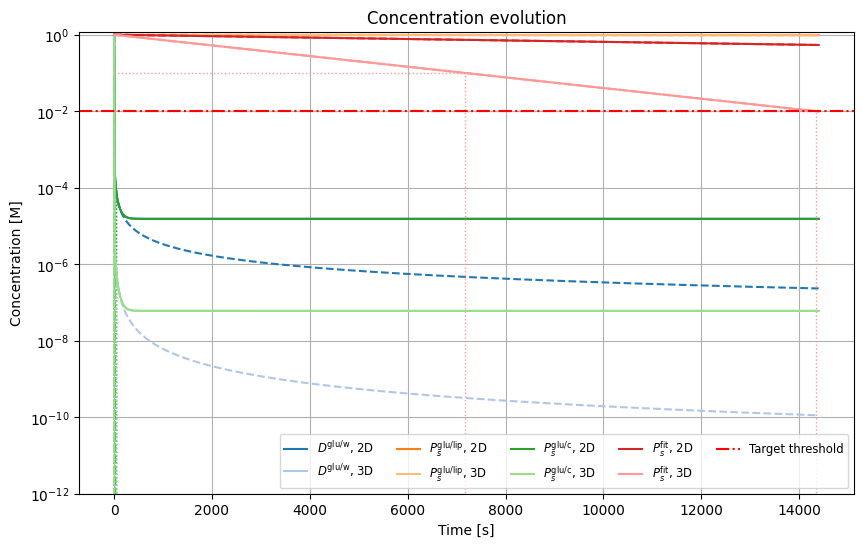

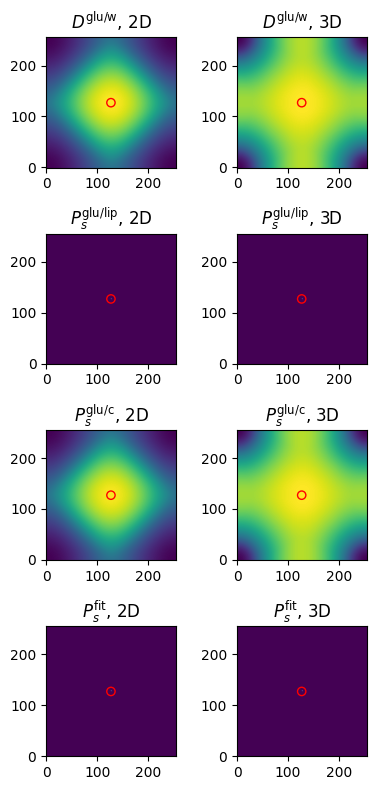

In [ ]:
global_id = 'ss_250109'
pt.plot_experiment_results(global_id, logy=True, target_thresh=0.01, color_pairs=True)

As expected, in all scenarios the inhibitor diffuses faster in the three-dimensional system than in the two-dimensional ones.

Due to fast diffusion, the numerical solutions for $D^{\text{glu/w}}$ and $P_s^{\text{glu/c}}$ quickly reach saturation of the finite lattice, which results in an overlap of the blue and green solid curves for any significantly large values of $t$. Due to their fundamentally different mathematical formulations (assumption of a constant external concentration of zero in the $P_s^{\text{glu/c}}$ experiment), the analytical solutions for these two scenarios behave differently - for $D^{\text{glu/w}}$ the decrease gradually slows down, while for $P_s^{\text{glu/c}}$ a steep decrease to very low values is exhibited.

The $P_s^{\text{glu/lip}}$ marked by the orange curves is so slow that it doesn't lead to any signifficant inhibitor release in the given time. The estimated permeation constant $P_s^{\text{fit}}$ expectedly leads to the threshold concentration at the spore within $t=4$ h, since it was analytically computed from these concentration and time values in the first place.

These results point to the conclusion that unobstructed diffusion from the cell wall is not a limiting factor for germination inhibition, but a barrier with the properties of cellulose or a lipid bilayer is too impermeable for the inhibitor to be released on time. The estimated permeation constant has a faster release, but it is yet to be determined how this translates to the properties of the barrier and the molecule diffusing through it.

## 2. Spore arrays

It has been observed experimentally [1] that spore density-dependent inhibition occurs when the inoculum in a $150 \mu\text{L}$ medium is increased from 5000 spores to 40000 spores. The plots below visualise how four spore densities within this range (5000, 10000, 20000, and 40000 spores per $150 \mu\textrm{L}$) translate to a three-dimensional array with uniform interconidial distances and to a two-dimensional array at the bottom of a reference volume of approximately $4.19\times 10^{-3}$ mL.

In [8]:
N = 255
H = 511
dx = 5
spore_density_base = 1/3 * 10**5 # spores per mL
density_factors = 2**np.arange(0, 4, 1)
spore_densities = spore_density_base * density_factors
print(spore_densities)

# Uniform spore grid
print("Populating uniform 3D spore grid")
spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

# Spores at the bottom of grid
print("Populating uniform 2D spore grid at bottom of lattice")
spore_coords_all_bottom = []
spore_spacing_all_bottom = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density, H)
    spore_coords_all_bottom.append(spore_coords)
    spore_spacing_all_bottom.append(spore_spacing)

[ 33333.33333333  66666.66666667 133333.33333333 266666.66666667]
Populating uniform 3D spore grid
Conversion: 3.33333333333333E-8 micrometers^-3
Effective density: 3.333333253863202e-08 spores/micrometer^3
Populating volume of 2097152000 micrometers^3 with 69.90506500005722 spores, 4 spores per dimension
Spore spacing: 320.0 micrometers
Conversion: 6.66666666666667E-8 micrometers^-3
Effective density: 6.666666507726404e-08 spores/micrometer^3
Populating volume of 2097152000 micrometers^3 with 139.81013000011444 spores, 5 spores per dimension
Spore spacing: 256.0 micrometers
Conversion: 1.33333333333333E-7 micrometers^-3
Effective density: 1.3333333015452808e-07 spores/micrometer^3
Populating volume of 2097152000 micrometers^3 with 279.6202600002289 spores, 6 spores per dimension
Spore spacing: 213.33333333333334 micrometers
Conversion: 2.66666666666667E-7 micrometers^-3
Effective density: 2.6666666030905617e-07 spores/micrometer^3
Populating volume of 2097152000 micrometers^3 with 559

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_16568\2208470336.py:3: SyntaxWarning: invalid escape sequence '\m'
  titles=[str(np.format_float_scientific(np.round(spore_densities[0], 1))) + title_base + f'{round(spore_spacing_all[0])} $\mu$m',
C:\Users\mihbo\AppData\Local\Temp\ipykernel_16568\2208470336.py:4: SyntaxWarning: invalid escape sequence '\m'
  str(np.format_float_scientific(np.round(s

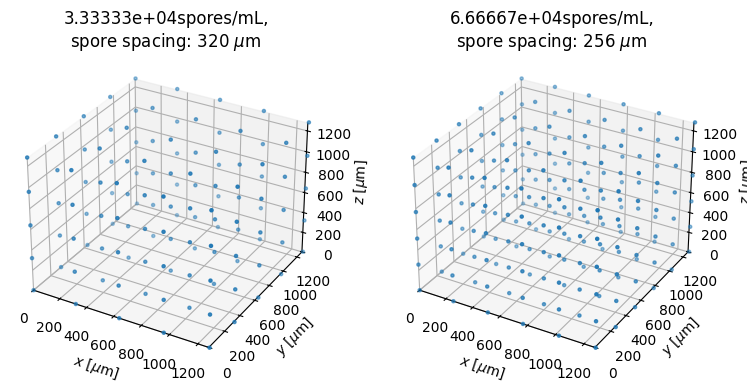

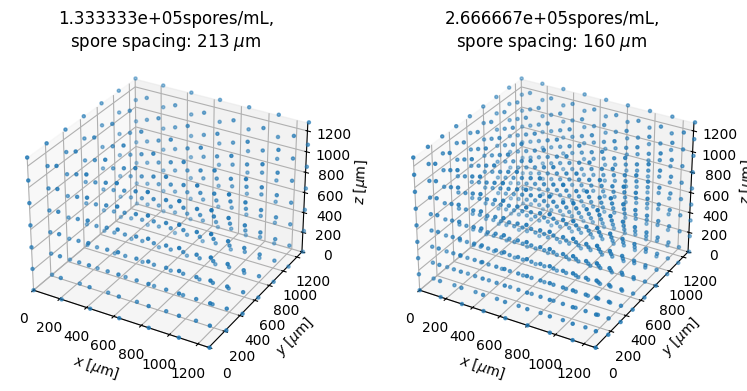

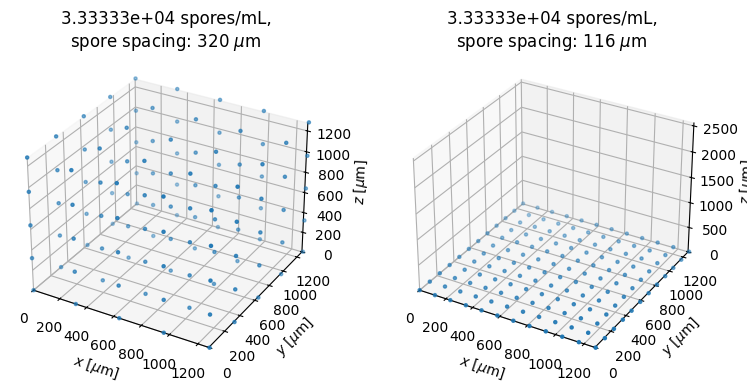

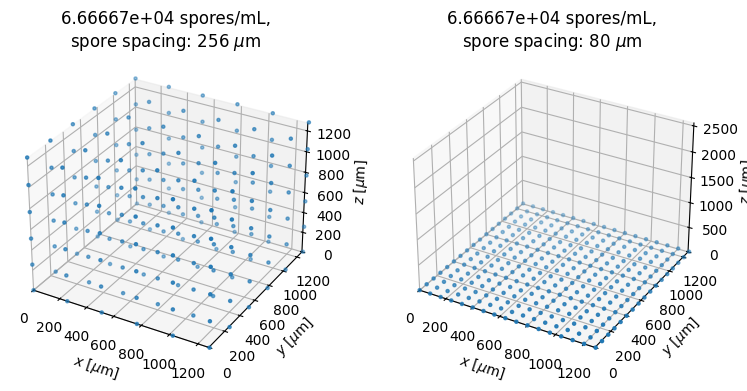

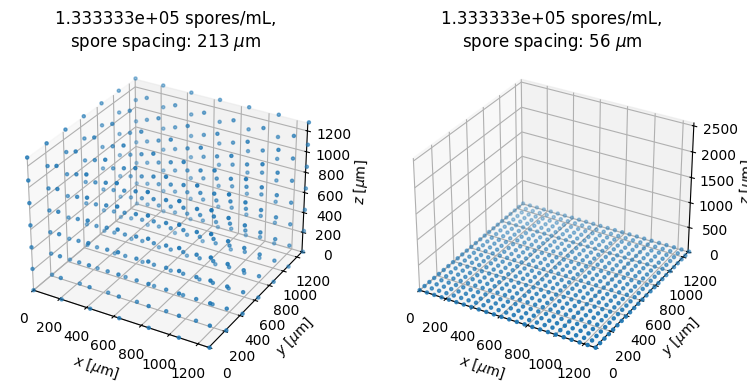

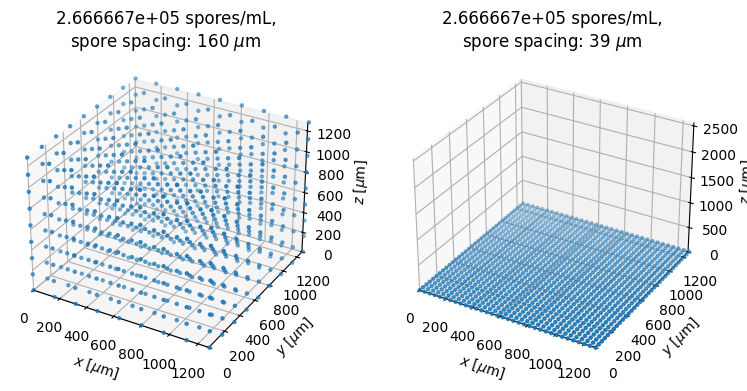

In [9]:
title_base = 'spores/mL,\nspore spacing: '
pt.plot_spore_positions([N, N], [N, N], [spore_coords_all[0], spore_coords_all[1]], dx,
                            titles=[str(np.format_float_scientific(np.round(spore_densities[0], 1))) + title_base + f'{round(spore_spacing_all[0])} $\mu$m',
                                    str(np.format_float_scientific(np.round(spore_densities[1], 1))) + title_base + f'{round(spore_spacing_all[1])} $\mu$m'])
pt.plot_spore_positions([N, N], [N, N], [spore_coords_all[2], spore_coords_all[3]], dx,
                            titles=[str(np.format_float_scientific(np.round(spore_densities[2], 1))) + title_base + f'{round(spore_spacing_all[2])} $\mu$m',
                                    str(np.format_float_scientific(np.round(spore_densities[3], 1))) + title_base + f'{round(spore_spacing_all[3])} $\mu$m'])

for i in range(len(spore_coords_all)):
    title_base = f'{str(np.format_float_scientific(np.round(spore_densities[i], 1)))} spores/mL,\nspore spacing: '
    spores_show = [spore_coords_all[i], spore_coords_all_bottom[i]]
    pt.plot_spore_positions([N, N], [N, H], spores_show, dx,
                            titles=[title_base + f'{round(spore_spacing_all[i])} $\mu$m', title_base + f'{round(spore_spacing_all_bottom[i])} $\mu$m'], top_view=False)


## 3. Multi-spore experiments

Simulating a diffusion process in an array of spores is facilitated by the uniformity of the grid, as it suffices to simulate only a single spore within a triply periodic volume with size $L$ equal to the distance between the spores on the grid.

The objective of the following experiments is to determine whether the decreasing spacing between the spores causes a saturation of the inhibitor in the surrounding medium, large enough to decrease the concentration gradient driving the diffusion from the spores.

In [104]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# General simulation parameters
t_max = 14400 # seconds
dt = 0.005
dx = 5 # microns
n_save_frames = 1000
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Input spore densities
spore_density_base = 1/3 * 10**5 # spores per mL
density_factors = 2**np.arange(0, 4, 1)
spore_densities = spore_density_base * density_factors

global_id = 'ms_250108'
exp_params = [
    {'expID': global_id, 'simID': 'D1', 'label':r'$3.33\times 10^4$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': spore_densities[0]},
    {'expID': global_id, 'simID': 'D2', 'label':r'$6.67\times 10^4$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': spore_densities[1]},
    {'expID': global_id, 'simID': 'D3', 'label':r'$1.33\times 10^5$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': spore_densities[2]},
    {'expID': global_id, 'simID': 'D4', 'label':r'$2.67\times 10^5$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': spore_densities[3]}
    ]

# Run simulations
st.run_diffusion_experiments_multi_spore(exp_params, t_max, dt, dx, n_save_frames, V_spore, c_thresh_factors)

Conversion: 3.33333333333333E-8 micrometers^-3
D1: Running simulation $3.33\times 10^4$ spores/mL on lattice with size 63
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [320 320 320] microns.
0.0098268003971253
Conversion: 6.66666666666667E-8 micrometers^-3
D2: Running simulation $6.67\times 10^4$ spores/mL on lattice with size 50
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [255 255 255] microns.
0.009830318044904255
Conversion: 1.33333333333333E-7 micrometers^-3
D3: Running simulation $1.33\times 10^5$ spores/mL on lattice with size 40
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [205 205 205] microns.
0.009836903155776039
Conversion: 2.66666666666667E-7 micrometers^-3
D4: Running simulation $2.67\ti

## 4. Experiment results

The results from all four simulated densities are visualised in the plots below. To compare the final concentration distributions, colour maps of the final lattice states are shown by taking a cross-section through the spore, using the largest lattice (corresponding to lowest spore density) as a reference and padding the smaller lattices (corresponding to denser spore arrangements) with repeated images of the concentrations to align them with the largest lattice size.

In [55]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:268: SyntaxWarning: invalid escape sequence '\m'
  c_max = max(c_max, np.max(c_evolution[-1]))


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

Plotting simulation D1: $3.33\times 10^4$ spores/mL
Plotting simulation D2: $6.67\times 10^4$ spores/mL
Plotting simulation D3: $1.33\times 10^5$ spores/mL
Plotting simulation D4: $2.67\times 10^5$ spores/mL


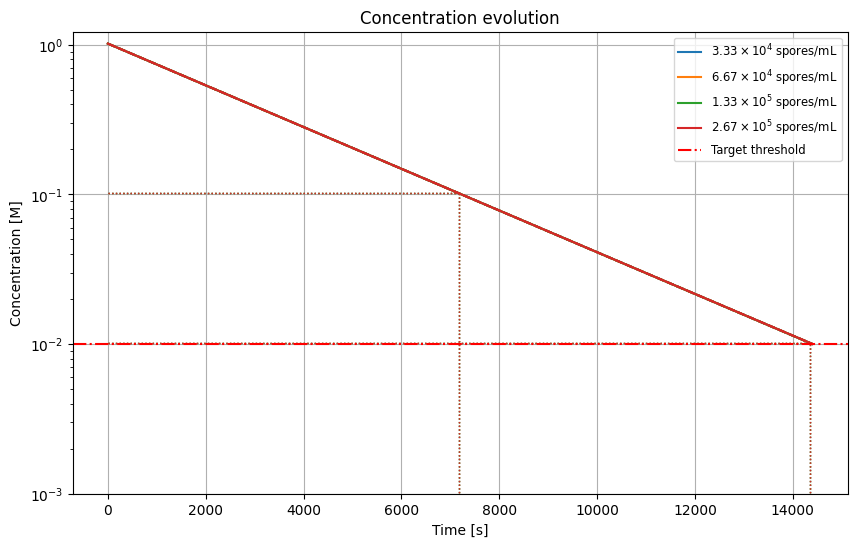

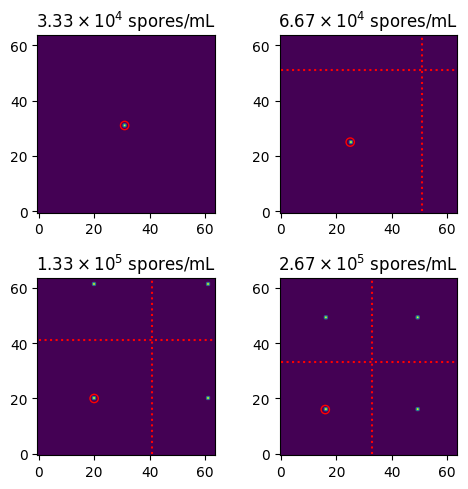

In [56]:
global_id = 'ms_250108'
pt.plot_experiment_results(global_id, logy=True, target_thresh=0.01, mark_spore=True)

## 5. Discussion

The results show no difference in the time for reaching the inhibitor concentration threshold, suggesting that no saturation effects occur. This appears logical, since the volumes surounding the spores are of mulitple orders larger than the spore diameter. Therefore, the limited initial concentration within the spore wall cannot fill the exterior space with a significant quantity to obstruct diffusion before the threshold of 10 M is reached.

This raises the question what densities are needed to observe such saturation effects and how the saturation behaves as a function of inter-spore distances.

Furthermore, this invites an investigation of more realistic scenarios in which local spatial pockets can trap concentrations and cause inhibition. This could happen, for instance, if diffusion is obstructed by spores being positioned at the bottom of a lattice with impermeable boundaries in the $z$-direction (see illustrations of spore arrays). Alternatively, spatial pockets can be formed by irregular aggregations of spores, which are observed in practice [2]. The spatial articulation of the extracellular medium can also be enhanced by simulating more accurate spore shapes - spheres instead of points/cubes.

## References
- [1] Ijadpanahsaravi, Maryam, L. Basten Snoek, Wieke R. Teertstra and Han A. B. Wösten. “The impact of inter- and intra-species spore density on germination of the food spoilage fungus Aspergillus niger.” International journal of food microbiology 410 (2023): 110495 .
- [2] Lyu, Jun, Martin Tegelaar, Harm Post, Juan P. Moran Torres, Costanza Torchia, Af Maarten Altelaar, R. Bleichrodt, Hans de Cock, Luis G Lugones and Han A. B. Wösten. “Heterogeneity in Spore Aggregation and Germination Results in Different Sized, Cooperative Microcolonies in an Aspergillus niger Culture.” mBio 14 (2023): n. pag.